In [1]:
import requests
import json
from config import api_key
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
cityidlist = []
idlimit = 0
with open('city.list.json', 'r', encoding='utf8') as ct:
    ct_dict = json.load(ct)
for x in ct_dict:
    cityidlist.append(x['id'])
    idlimit += 1
    if idlimit == 1000:
        break
print(len(cityidlist))

1000


In [3]:
# api.openweathermap.org/data/2.5/weather?id={city id}&appid={your api key}
url = 'http://api.openweathermap.org/data/2.5/weather?'
response_list = []
unit = 'Imperial'
for x in cityidlist:
    base_url = url + "id=" + str(x) + "&appid=" + api_key + "&units=" + unit
    response = requests.get(base_url).json()
    response_list.append(response)

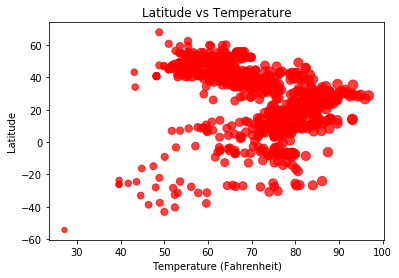

In [4]:
# Temperature (F) vs. Latitude
temp = []
latitude = []
for x in response_list:
    temp.append(x['main']['temp'])
    latitude.append(x['coord']['lat'])
plt.scatter(temp, latitude, facecolor='red', s=temp, alpha=0.75)
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Latitude')
plt.title('Latitude vs Temperature')
plt.show()

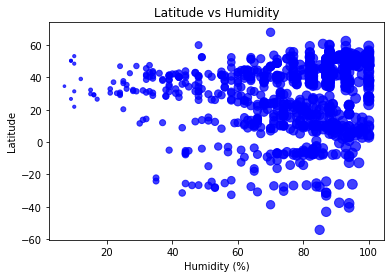

In [5]:
# Humidity (%) vs. Latitude
humidity = []
latitude = []
for x in response_list:
    humidity.append(x['main']['humidity'])
    latitude.append(x['coord']['lat'])
plt.scatter(humidity, latitude, facecolor='blue', s=humidity, alpha=0.75)
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title('Latitude vs Humidity')
plt.show()

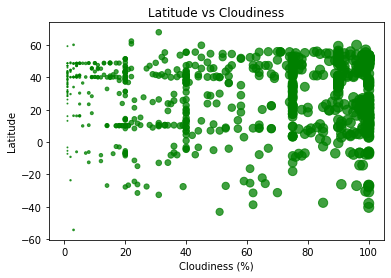

In [6]:
# Cloudiness (%) vs. Latitude

cloudiness = []
latitude = []
for x in response_list:
    cloudiness.append(x['clouds']['all'])
    latitude.append(x['coord']['lat'])   

plt.scatter(cloudiness, latitude, facecolor='green', s=cloudiness, alpha=0.75)
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title('Latitude vs Cloudiness')
plt.show()

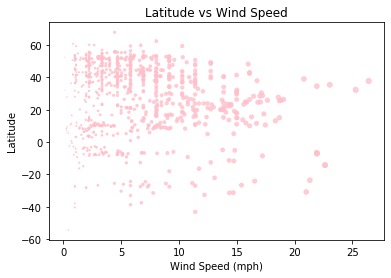

In [7]:
# Wind Speed (mph) vs. Latitude
wspeed = []
latitude = []
for x in response_list:
    wspeed.append(x['wind']['speed'])
    latitude.append(x['coord']['lat'])   

plt.scatter(wspeed, latitude, facecolor='pink', s=wspeed, alpha=0.75)
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title('Latitude vs Wind Speed')
plt.show()

892
892
108
108


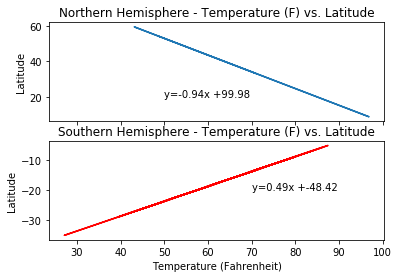

In [8]:
# Northern Hemisphere - Temperature (F) vs. Latitude
# Southern Hemisphere - Temperature (F) vs. Latitude
n_temp = []
s_temp = []
northern_latitude = []
southern_latitude = []
for x in response_list:
    if x['coord']['lat'] >= 0:
        northern_latitude.append(x['coord']['lat'])
        n_temp.append(x['main']['temp'])
    elif x['coord']['lat'] < 0:
        southern_latitude.append(x['coord']['lat'])
        s_temp.append(x['main']['temp']) 
 
(nslope, nintercept, nrvalue, npvalue, nstderror) = st.linregress(n_temp, northern_latitude)
nregress = nslope * np.asarray(n_temp) + nintercept
nequation = "y=" + str(round(nslope,2)) + "x +" + str(round(nintercept,2))

(sslope, sintercept, srvalue, spvalue, sstderror) = st.linregress(s_temp, southern_latitude)
sregress = sslope * np.asarray(s_temp) + sintercept
sequation = "y=" + str(round(sslope,2)) + "x +" + str(round(sintercept,2))

fig1, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(n_temp, nregress)
ax1.annotate(nequation, (50, 20), fontsize=10)
ax1.set_ylabel('Latitude')
ax1.set_title('Northern Hemisphere - Temperature (F) vs. Latitude')

ax2.plot(s_temp, sregress, color = 'red')
ax2.annotate(sequation, (70, -20), fontsize=10)
ax2.set_ylabel('Latitude')
ax2.set_xlabel('Temperature (Fahrenheit)')
ax2.set_title('Southern Hemisphere - Temperature (F) vs. Latitude')

plt.show()




892
892
108
108


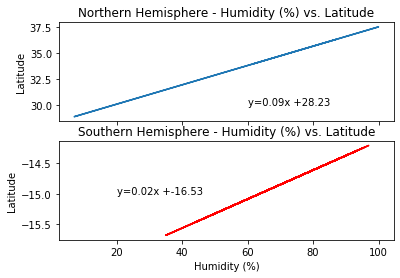

In [9]:
# Northern Hemisphere - Humidity (%) vs. Latitude
# Southern Hemisphere - Humidity (%) vs. Latitude
n_hum = []
s_hum = []
northern_latitude = []
southern_latitude = []
for x in response_list:
    if x['coord']['lat'] >= 0:
        northern_latitude.append(x['coord']['lat'])
        n_hum.append(x['main']['humidity'])
    elif x['coord']['lat'] < 0:
        southern_latitude.append(x['coord']['lat'])
        s_hum.append(x['main']['humidity'])  
 
(nslope, nintercept, nrvalue, npvalue, nstderror) = st.linregress(n_hum, northern_latitude)
nregress = nslope * np.asarray(n_hum) + nintercept
nequation = "y=" + str(round(nslope,2)) + "x +" + str(round(nintercept,2))

(sslope, sintercept, srvalue, spvalue, sstderror) = st.linregress(s_hum, southern_latitude)
sregress = sslope * np.asarray(s_hum) + sintercept
sequation = "y=" + str(round(sslope,2)) + "x +" + str(round(sintercept,2))

fig1, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(n_hum, nregress)
ax1.annotate(nequation, (60, 30), fontsize=10)
ax1.set_ylabel('Latitude')
ax1.set_title('Northern Hemisphere - Humidity (%) vs. Latitude')

ax2.plot(s_hum, sregress, color = 'red')
ax2.annotate(sequation, (20, -15), fontsize=10)
ax2.set_ylabel('Latitude')
ax2.set_xlabel('Humidity (%)')
ax2.set_title('Southern Hemisphere - Humidity (%) vs. Latitude')

plt.show()


892
892
108
108


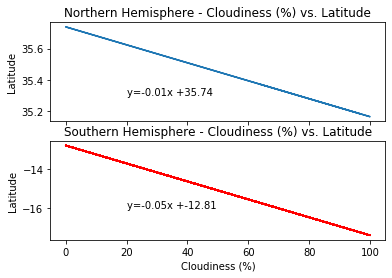

In [10]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
# Southern Hemisphere - Cloudiness (%) vs. Latitude
n_cloud = []
s_cloud = []
northern_latitude = []
southern_latitude = []
for x in response_list:
    if x['coord']['lat'] >= 0:
        northern_latitude.append(x['coord']['lat'])
        n_cloud.append(x['clouds']['all'])
    elif x['coord']['lat'] < 0:
        southern_latitude.append(x['coord']['lat'])
        s_cloud.append(x['clouds']['all'])
        
(nslope, nintercept, nrvalue, npvalue, nstderror) = st.linregress(n_cloud, northern_latitude)
nregress = nslope * np.asarray(n_cloud) + nintercept
nequation = "y=" + str(round(nslope,2)) + "x +" + str(round(nintercept,2))

(sslope, sintercept, srvalue, spvalue, sstderror) = st.linregress(s_cloud, southern_latitude)
sregress = sslope * np.asarray(s_cloud) + sintercept
sequation = "y=" + str(round(sslope,2)) + "x +" + str(round(sintercept,2))

fig1, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(n_cloud, nregress)
ax1.annotate(nequation, (20, 35.3), fontsize=10)
ax1.set_ylabel('Latitude')
ax1.set_title('Northern Hemisphere - Cloudiness (%) vs. Latitude')

ax2.plot(s_cloud, sregress, color = 'red')
ax2.annotate(sequation, (20, -16), fontsize=10)
ax2.set_ylabel('Latitude')
ax2.set_xlabel('Cloudiness (%)')
ax2.set_title('Southern Hemisphere - Cloudiness (%) vs. Latitude')

plt.show()


892
892
108
108


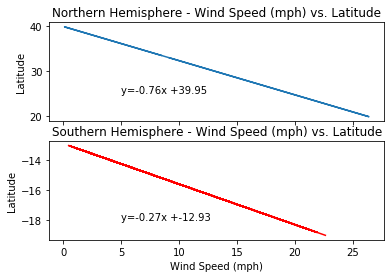

In [11]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
n_wspd = []
s_wspd = []
northern_latitude = []
southern_latitude = []
for x in response_list:
    if x['coord']['lat'] >= 0:
        northern_latitude.append(x['coord']['lat'])
        n_wspd.append(x['wind']['speed'])
    elif x['coord']['lat'] < 0:
        southern_latitude.append(x['coord']['lat'])
        s_wspd.append(x['wind']['speed']) 
 
(nslope, nintercept, nrvalue, npvalue, nstderror) = st.linregress(n_wspd, northern_latitude)
nregress = nslope * np.asarray(n_wspd) + nintercept
nequation = "y=" + str(round(nslope,2)) + "x +" + str(round(nintercept,2))

(sslope, sintercept, srvalue, spvalue, sstderror) = st.linregress(s_wspd, southern_latitude)
sregress = sslope * np.asarray(s_wspd) + sintercept
sequation = "y=" + str(round(sslope,2)) + "x +" + str(round(sintercept,2))

fig1, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(n_wspd, nregress)
ax1.annotate(nequation, (5, 25), fontsize=10)
ax1.set_ylabel('Latitude')
ax1.set_title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')

ax2.plot(s_wspd, sregress, color = 'red')
ax2.annotate(sequation, (5, -18), fontsize=10)
ax2.set_ylabel('Latitude')
ax2.set_xlabel('Wind Speed (mph)')
ax2.set_title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')

plt.show()
